# İTÜ MINDSET INSTITUTE FINAL PROJECT
    
    AHMET BERKAY GÜLTEKİN
    8 th Term Data Science Program
    14.08.2021 - 25.10.2021
    
## INFORMATION ABOUT DATA

## 1. Problem Definition

A University made its on campus placement records public for the world to see. The data is from the years 2013 and 2014.
The following is the college placements data compiled over 2 years. Use this data to predict and analyse whether a student gets placed, based on his/her background.

## 2. Data

Data Set can be found on https://www.kaggle.com/tejashvi14/engineering-placements-prediction

## 3. Features

Age = Age At The Time Of Final Year

Gender = Gender Of Candidate

Stream = Engineering Stream That The Candidate Belongs To

Internships = Number Of Internships Undertaken During The Course Of Studies, Not Necessarily Related To College Studies Or Stream

CGPA = CGPA Till 6th Semester

Hostel = Whether Student Lives In College Accomodation

History Of Backlogs = Whether Student Ever Had Any Backlogs In Any Subjects

PlacedOrNot = Target Variable

## 4. Importing Necessary Libraries & Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("collegePlace.csv"); df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566 entries, 0 to 3565
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                3566 non-null   int64 
 1   Gender             3566 non-null   object
 2   Stream             3566 non-null   object
 3   Internships        3566 non-null   int64 
 4   CGPA               3566 non-null   int64 
 5   Hostel             3566 non-null   int64 
 6   HistoryOfBacklogs  3566 non-null   int64 
 7   PlacedOrNot        3566 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 223.0+ KB


**As it is seen above, we only have 2 categorical variables. Gender & Stream. Now let's check whether our data has null variable or not. Then check statistical information.**

In [4]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [5]:
df.Gender.value_counts()

Male      2965
Female     601
Name: Gender, dtype: int64

In [6]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000
mean,21.555244,0.724341,7.114975,0.273135,0.192653,0.570107
std,1.324557,0.741483,0.971236,0.445632,0.394438,0.495130
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [7]:
df.corr()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,-0.002626,-0.130750,0.001042,-0.033531,0.045846
Internships,-0.002626,1.000000,0.031168,-0.003827,-0.004433,0.172991
CGPA,-0.130750,0.031168,1.000000,0.020749,-0.005849,0.574706
Hostel,0.001042,-0.003827,0.020749,1.000000,0.104297,-0.051212
HistoryOfBacklogs,-0.033531,-0.004433,-0.005849,0.104297,1.000000,-0.025370
PlacedOrNot,0.045846,0.172991,0.574706,-0.051212,-0.025370,1.000000


**We checked some features of our data. From now on, we will control whether placement dependent on our features or not. First let's look at percentages of male and female students on placement rate.**

Text(0.5, 1.0, 'Gender Distribution')

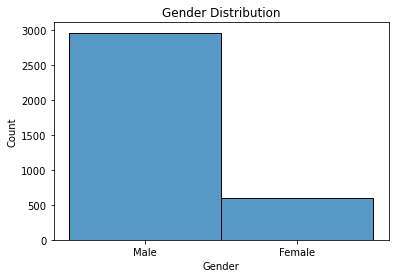

In [8]:
sns.histplot(df.Gender,bins=2).set_title("Gender Distribution")

**Now let's find the placement rates of male and female and insert this a Data Frame**

In [9]:
Total_Male = (df.Gender == "Male").sum()
Total_Female = (df.Gender == "Female").sum()

In [10]:
Male_Placed = ((df.Gender=="Male") & (df.PlacedOrNot == 1)).sum()
Female_Placed = ((df.Gender=="Female") & (df.PlacedOrNot == 1)).sum()

In [11]:
perc_male_placed = Male_Placed / Total_Male
perc_female_placed = Female_Placed / Total_Female

In [12]:
df_gender = pd.DataFrame({"Placed":[Male_Placed,Female_Placed],"Not Placed":[Total_Male - Male_Placed, Total_Female - Female_Placed]},index=["Male","Female"])

In [13]:
df_gender["%Placed"] = df_gender["Placed"]/df_gender.apply(sum,axis=1)
df_gender["%Not Placed"] = 1 - df_gender["%Placed"]

In [14]:
df_gender

,Placed,Not Placed,%Placed,%Not Placed
Male,1680,1285,0.566610,0.433390
Female,353,248,0.587354,0.412646


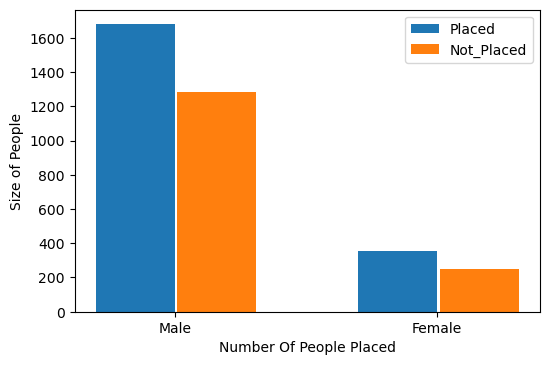

In [15]:
plt.figure(dpi=100)

bin_width = 0.3
epsiln = 0.01
plt.bar(df_gender.index,df_gender.Placed,width=bin_width)
plt.bar(np.arange(2) + bin_width + epsiln , df_gender["Not Placed"] , width= bin_width)
plt.xticks(np.arange(2) + bin_width/2,df_gender.index)
plt.legend(["Placed","Not_Placed"])
plt.ylabel("Size of People")
plt.xlabel("Number Of People Placed")
plt.show()

**Now Let's check whether placement depend on age or not**

In [16]:
df.Age.value_counts().sort_index()

19     156
20     375
21    1346
22    1219
23     195
24     142
25      46
26      82
28       3
29       1
30       1
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

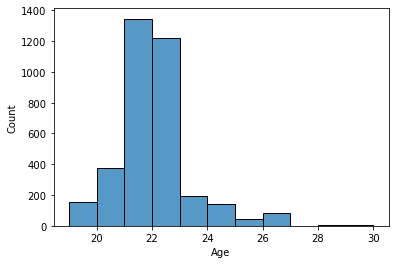

In [17]:
sns.histplot(df.Age,bins=len(df.Age.unique()))

In [18]:
df_age = df.pivot_table(index="Age",values="PlacedOrNot",aggfunc=np.size)

In [19]:
for i in df_age.index:
    df_age.loc[[i],["Placed"]] = ((df.Age == i) & (df.PlacedOrNot == 1)).sum()

In [20]:
for i in df_age.index:
    df_age.loc[[i],["Not_Placed"]] = ((df.Age == i) & (df.PlacedOrNot == 0)).sum()

In [21]:
df_age["%Placed"] = df_age["Placed"]/df_age["PlacedOrNot"]
df_age["%NotPlaced"] = df_age["Not_Placed"] / df_age["PlacedOrNot"]

In [22]:
df_age

,PlacedOrNot,Placed,Not_Placed,%Placed,%NotPlaced
Age,,,,,
19,156,92.0,64.0,0.589744,0.410256
20,375,199.0,176.0,0.530667,0.469333
21,1346,799.0,547.0,0.593611,0.406389
22,1219,649.0,570.0,0.532404,0.467596
23,195,85.0,110.0,0.435897,0.564103
24,142,112.0,30.0,0.788732,0.211268
25,46,34.0,12.0,0.739130,0.260870
26,82,58.0,24.0,0.707317,0.292683
28,3,3.0,0.0,1.000000,0.000000


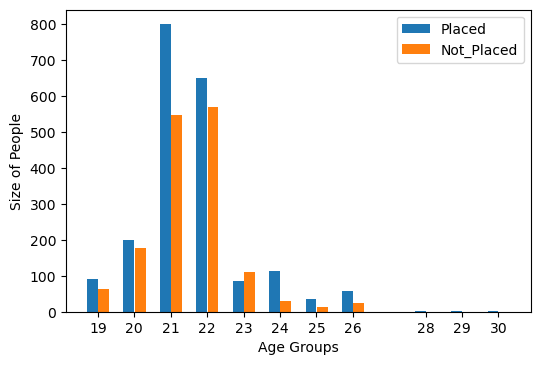

In [23]:
plt.figure(dpi=100)

bin_width = 0.3
epsiln = 0.01
plt.bar(df_age.index,df_age.Placed,width=bin_width)
plt.bar(df_age.index + bin_width + epsiln , df_age["Not_Placed"] , width= bin_width)
plt.xticks(df_age.index + bin_width/2,df_age.index)
plt.legend(["Placed","Not_Placed"])
plt.ylabel("Size of People")
plt.xlabel("Age Groups")
plt.show()

**Now let's look at whether internship number has an effect on the placement or not.**

In [24]:
internship = df.pivot_table(index=["Internships"],values="PlacedOrNot",aggfunc=np.size)

In [25]:
internship

,PlacedOrNot
Internships,
0,1552
1,1500
2,459
3,55


In [26]:
for i in range(4):
    internship.loc[[i],["Placed"]] = ((df.Internships == i) & (df.PlacedOrNot == 1)).sum()

In [27]:
for i in internship.index:
    internship.loc[[i],["NotPlaced"]] = ((df.Internships == i) & (df.PlacedOrNot == 0)).sum()

In [28]:
internship["%Placed"] = internship["Placed"] / internship["PlacedOrNot"]

In [29]:
internship["%NotPlaced"] = 1 - internship["%Placed"]

In [30]:
internship

,PlacedOrNot,Placed,NotPlaced,%Placed,%NotPlaced
Internships,,,,,
0,1552,794.0,758.0,0.511598,0.488402
1,1500,822.0,678.0,0.548000,0.452000
2,459,374.0,85.0,0.814815,0.185185
3,55,43.0,12.0,0.781818,0.218182


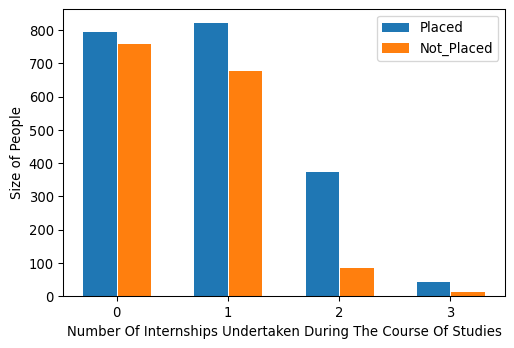

In [31]:
#Increase resolution to dpi=100
plt.figure(dpi=95)

bin_width = 0.3
epsiln = 0.01
plt.bar(internship.index,internship.Placed,width=bin_width)
plt.bar(internship.index + bin_width + epsiln , internship.NotPlaced , width= bin_width)
plt.xticks(internship.index + bin_width/2,internship.index)
plt.legend(["Placed","Not_Placed"])
plt.ylabel("Size of People")
plt.xlabel("Number Of Internships Undertaken During The Course Of Studies")
plt.show()

**Now let's investigate wheather engineering stream has an effect on placed or not.**

In [32]:
df.Stream.unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [33]:
df_stream = df.pivot_table(index="Stream",values="PlacedOrNot",aggfunc=np.size)

In [34]:
for i in df_stream.index:
    df_stream.loc[[i],["Placed"]] = ((df.Stream == i) & (df.PlacedOrNot == 1)).sum()

In [35]:
for i in df_stream.index:
    df_stream.loc[[i],["Not_Placed"]] = ((df.Stream == i) & (df.PlacedOrNot == 0)).sum()

In [36]:
df_stream["%Placed"] = df_stream["Placed"]/df_stream["PlacedOrNot"]
df_stream["%Not_Placed"]=df_stream["Not_Placed"]/df_stream["PlacedOrNot"]

In [37]:
df_stream

,PlacedOrNot,Placed,Not_Placed,%Placed,%Not_Placed
Stream,,,,,
Civil,380,174.0,206.0,0.457895,0.542105
Computer Science,920,563.0,357.0,0.611957,0.388043
Electrical,395,220.0,175.0,0.556962,0.443038
Electronics And Communication,499,297.0,202.0,0.595190,0.404810
Information Technology,852,532.0,320.0,0.624413,0.375587
Mechanical,520,247.0,273.0,0.475000,0.525000


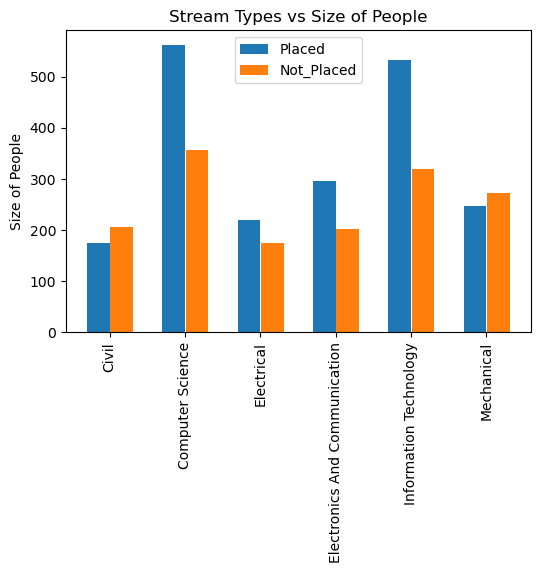

In [38]:
plt.figure(dpi=100)

bin_width = 0.3
epsiln = 0.01
plt.bar(df_stream.index,df_stream.Placed,width=bin_width)
plt.bar(np.arange(6) + bin_width + epsiln , df_stream["Not_Placed"] , width= bin_width)
plt.xticks(np.arange(6) + bin_width/2,df_stream.index,rotation=90)
plt.legend(["Placed","Not_Placed"])
plt.ylabel("Size of People")
plt.title("Stream Types vs Size of People")
plt.show()

**Let's check cgpa average and whether affect on placement or not.**

In [39]:
df.CGPA.mean()

7.114974761637689

In [40]:
cgpa_above_average_placed = df[df.CGPA > df.CGPA.mean()]["PlacedOrNot"].value_counts()[1]
cgpa_above_average_not_placed = df[df.CGPA > df.CGPA.mean()]["PlacedOrNot"].value_counts().sum() - df[df.CGPA > df.CGPA.mean()]["PlacedOrNot"].value_counts()[1]
cgpa_below_average_placed = df[df.CGPA < df.CGPA.mean()]["PlacedOrNot"].value_counts()[1]
cgpa_below_average_not_placed = df[df.CGPA < df.CGPA.mean()]["PlacedOrNot"].value_counts()[0]

In [41]:
df_cgpa = pd.DataFrame({"Placed":[cgpa_above_average_placed,cgpa_below_average_placed],"Not_Placed":[cgpa_above_average_not_placed,cgpa_below_average_not_placed]},index=["CGPA Above Average","CGPA Below Average"])

In [42]:
df_cgpa["%Placed"] = df_cgpa["Placed"]/df_cgpa.apply(sum, axis=1)

In [43]:
df_cgpa["%Not_Placed"] = df_cgpa["Not_Placed"]/df_cgpa.apply(sum, axis=1)

In [44]:
df_cgpa

,Placed,Not_Placed,%Placed,%Not_Placed
CGPA Above Average,1330,0,1.000000,0.000000
CGPA Below Average,703,1533,0.314401,0.685503


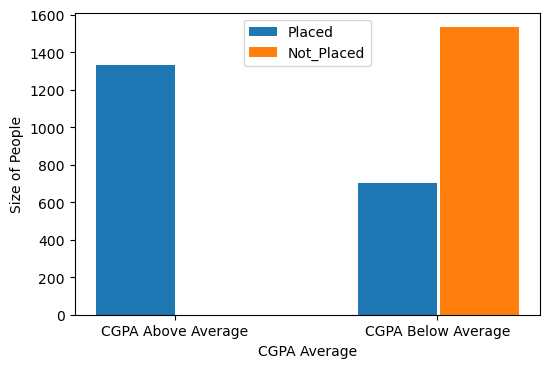

In [45]:
plt.figure(dpi=100)

bin_width = 0.3
epsiln = 0.01
plt.bar(df_cgpa.index,df_cgpa.Placed,width=bin_width)
plt.bar(np.arange(2) + bin_width + epsiln , df_cgpa["Not_Placed"] , width= bin_width)
plt.xticks(np.arange(2) + bin_width/2,df_cgpa.index)
plt.legend(["Placed","Not_Placed"])
plt.ylabel("Size of People")
plt.xlabel("CGPA Average")
plt.show()

**CGPA mean values did not say anything to me so I want to look at CGPA by CGPA to obtain more meaningful results. So I use crosstab functions to do that.**

In [46]:
#crosstab function can be used for computing a simple cross tabulation of two (or more) factors.
pd.crosstab(df.CGPA,df.PlacedOrNot)

PlacedOrNot,0,1
CGPA,,
5,89,7
6,631,339
7,813,357
8,0,1088
9,0,242


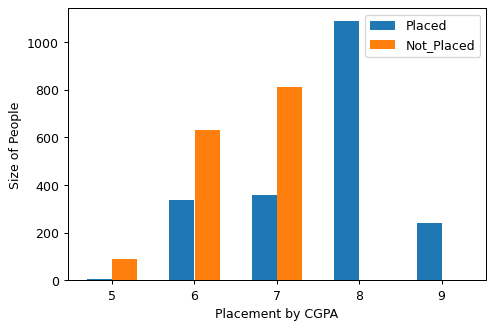

In [47]:
plt.figure(dpi=90)

bin_width = 0.3
epsiln = 0.01
plt.bar(pd.crosstab(df.CGPA,df.PlacedOrNot).index,pd.crosstab(df.CGPA,df.PlacedOrNot)[1],width=bin_width)
plt.bar(pd.crosstab(df.CGPA,df.PlacedOrNot).index + bin_width + epsiln , pd.crosstab(df.CGPA,df.PlacedOrNot)[0] , width= bin_width)
plt.xticks(pd.crosstab(df.CGPA,df.PlacedOrNot).index + bin_width/2,pd.crosstab(df.CGPA,df.PlacedOrNot).index)
plt.legend(["Placed","Not_Placed"])
plt.ylabel("Size of People")
plt.xlabel("Placement by CGPA")
plt.show()

In [48]:
df_hostel = pd.crosstab(df.Hostel,df.PlacedOrNot);df_hostel

PlacedOrNot,0,1
Hostel,,
0,1074,1518
1,459,515


In [49]:
#Let's change the index and column name for better reading
df_hostel.set_axis(["Not_Placed","Placed"],axis=1,inplace=True)

In [50]:
df_hostel.set_axis(["Lives in Elsewhere","Lives in Hostel"],axis=0,inplace=True)

In [51]:
df_hostel["%Placed"] = df_hostel["Placed"]/df_hostel.apply(sum,axis=1)
df_hostel["%Not_Placed"] =df_hostel["Not_Placed"]/df_hostel.apply(sum,axis=1)

In [52]:
df_hostel

,Not_Placed,Placed,%Placed,%Not_Placed
Lives in Elsewhere,1074,1518,0.585648,0.414258
Lives in Hostel,459,515,0.528747,0.470997


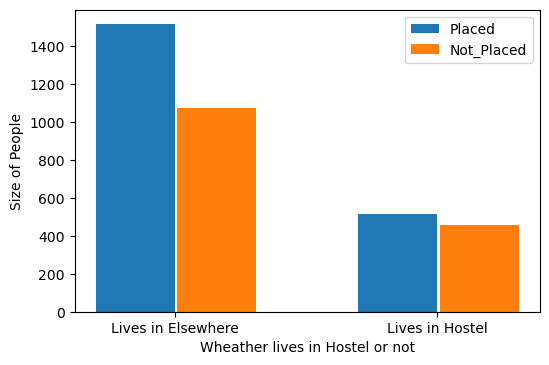

In [53]:
plt.figure(dpi=100)

bin_width = 0.3
epsiln = 0.01
plt.bar(df_hostel.index,df_hostel.Placed,width=bin_width)
plt.bar(np.arange(2) + bin_width + epsiln , df_hostel.Not_Placed , width= bin_width)
plt.xticks(np.arange(2) + bin_width/2,df_hostel.index)
plt.legend(["Placed","Not_Placed"])
plt.ylabel("Size of People")
plt.xlabel("Wheather lives in Hostel or not")
plt.show()

In [54]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


**And now we will check the dependency of the placement rate on the backlogs**

In [55]:
df_backlogs = pd.crosstab(df.HistoryOfBacklogs,df.PlacedOrNot)

In [56]:
df_backlogs.set_axis(["Not_Placed","Placed"],axis=1,inplace=True)

In [57]:
df_backlogs.set_axis(["Do not have any Backlog","Have a Backlog"],axis=0,inplace=True)

In [58]:
#Set index and column names
df_backlogs["%Placed"]=df_backlogs["Placed"]/df_backlogs.apply(sum, axis=1)
df_backlogs["%Not_Placed"] = df_backlogs["Not_Placed"]/df_backlogs.apply(sum, axis=1)

In [59]:
df_backlogs

,Not_Placed,Placed,%Placed,%Not_Placed
Do not have any Backlog,1220,1659,0.576242,0.423673
Have a Backlog,313,374,0.544396,0.455243


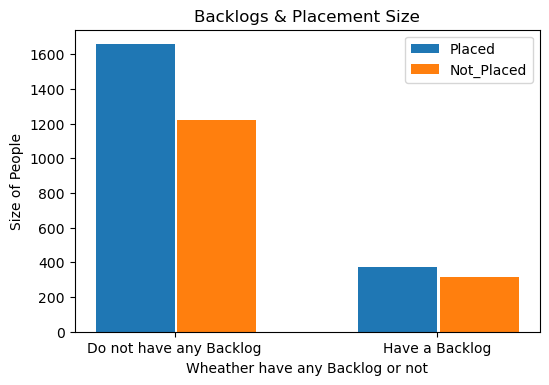

In [60]:
plt.figure(dpi=100)

bin_width = 0.3
epsiln = 0.01
plt.bar(df_backlogs.index,df_backlogs.Placed,width=bin_width)
plt.bar(np.arange(2) + bin_width + epsiln , df_backlogs.Not_Placed , width= bin_width)
plt.xticks(np.arange(2) + bin_width/2,df_backlogs.index)
plt.legend(["Placed","Not_Placed"])
plt.ylabel("Size of People")
plt.xlabel("Wheather have any Backlog or not")
plt.title("Backlogs & Placement Size")
plt.show()

## Now we try to deal with categorical variables

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566 entries, 0 to 3565
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                3566 non-null   int64 
 1   Gender             3566 non-null   object
 2   Stream             3566 non-null   object
 3   Internships        3566 non-null   int64 
 4   CGPA               3566 non-null   int64 
 5   Hostel             3566 non-null   int64 
 6   HistoryOfBacklogs  3566 non-null   int64 
 7   PlacedOrNot        3566 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 223.0+ KB


In [62]:
dummies=pd.get_dummies(df,drop_first=True);dummies.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender_Male,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22,1,8,1,1,1,1,0,0,1,0,0
1,21,0,7,1,1,1,0,1,0,0,0,0
2,22,1,6,0,0,1,0,0,0,0,1,0
3,21,0,8,0,1,1,1,0,0,0,1,0
4,22,0,8,1,0,1,1,0,0,0,0,1


In [63]:
dummies = dummies.loc[:,["Age","Gender_Male","Internships","CGPA","Hostel","HistoryOfBacklogs","Stream_Computer Science","Stream_Electronics And Communication","Stream_Information Technology","Stream_Mechanical","PlacedOrNot"]]

In [64]:
dummies

,Age,Gender_Male,Internships,CGPA,Hostel,HistoryOfBacklogs,Stream_Computer Science,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical,PlacedOrNot
0,22,1,1,8,1,1,0,1,0,0,1
1,21,0,0,7,1,1,1,0,0,0,1
2,22,0,1,6,0,0,0,0,1,0,1
3,21,1,0,8,0,1,0,0,1,0,1
4,22,1,0,8,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3561,22,1,0,7,1,1,0,0,0,1,0
3562,22,1,2,8,0,0,0,0,1,0,1
3563,22,0,0,6,1,1,1,0,0,0,0
3564,21,1,2,6,0,0,0,0,1,0,1


In [65]:
#Now let's seperate Features and Targets
X = dummies.iloc[:,0:-1]
y = dummies["PlacedOrNot"]

## 5. Scaling DataFrame and Build Models

    Since Age, CGPA and other features have different scala from each other, we better apply standardization
    to our model to have common scale

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()
print(scaler.fit(X))

StandardScaler()


In [68]:
scaled_data = pd.DataFrame(scaler.transform(X),columns=dummies.columns[:-1])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test =train_test_split(scaled_data,y,test_size=0.2,random_state=42, stratify=y)

## 5.1 Models
    In models, I will build up base models and do some parameter tuning for 1 model. Then I will show GridSearch and how to do parameter tuning.
###   5.1.1 KNeighbors Classifier

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, roc_auc_score,roc_curve, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [72]:
scores=[]
for i in range(1,15):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred = KNN.predict(X_test)
    scores.append([i,np.array(KNN.score(X_test,y_test))])

In [73]:
knn_scores = pd.DataFrame(scores, columns=["Neighbors","KNN_Score"]).set_index("Neighbors")

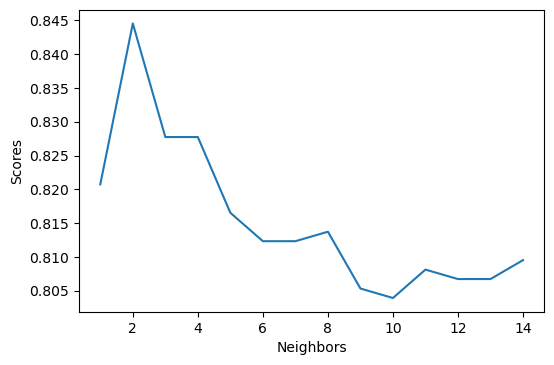

In [74]:
plt.figure(dpi=100)
plt.plot(knn_scores.index,knn_scores.KNN_Score)
plt.xlabel("Neighbors")
plt.ylabel("Scores")
plt.show()

In [75]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.8445378151260504


### 5.1.2 Decision Tree Classifier with Bagging Classifier
    Now we use Decision Tree Classifier with Bagging Classifier. In base model, decision tree classifier would over fit. But in bagging classifier, we want this model to overfit to obtain best results since bagging classifier obtain datasets out of our original dataset and for each dataset, fits a tree in that data. At the end it calculate average error. Thus it is okay to overfit for a model. So that is okay to overfit since we will solve this problem with constructing more trees. 

In [76]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [77]:
tree = DecisionTreeClassifier()
bag =BaggingClassifier(tree, n_estimators=100, random_state=42,oob_score=True)
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  oob_score=True, random_state=42)

In [78]:
y_pred = bag.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test,y_pred),"Oob_Accuracy: ", bag.oob_score_)

Test Accuracy:  0.8599439775910365 Oob_Accuracy:  0.8797335203366059


**Oob score** is similar to cross validation. While we produce datasets, we exclude some data. So, after construct our model, we calculate error with excluded data. That's called out of bag score. We can use oob score for model selection without using cross validation.

**In this method** model interpretibility is low since there are so many trees and we cannot see the trees.
Bagging classifier may be biased since trees are similar to each other. That's why we will do Random Forest Classifier.

### 5.1.3 Random Forest Classifier
In the Random Forest Classifier, instead of taking all feature, we randomly select features. Thus we add randomness to our model. This tree is generally perform better.

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
RandomForestClassifier()

RandomForestClassifier()

Let's check some attributes meaning

**n_estimators** : The number of trees in the forest. Default= 100

**max_features** : {"auto", "sqrt", "log2"} The number of features to consider when looking for the best split.
 - If int, then consider `max_features` features at each split.
 - If float, then `max_features` is a fraction and `round(max_features * n_features)` features are considered at each split.
 - If "auto", then `max_features=sqrt(n_features)`.
 - If "sqrt", then `max_features=sqrt(n_features)` (same as "auto").
 - If "log2", then `max_features=log2(n_features)`.  
 - If None, then `max_features=n_features`.

In [81]:
clf = RandomForestClassifier(random_state=42 , n_estimators = 100,oob_score=True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred),'Oob Accuracy:',clf.oob_score_)

Test Accuracy: 0.8571428571428571 Oob Accuracy: 0.8779803646563815


This was our base model. 

Let's try different number of trees to tune our model.

In [82]:
Oob_accuracy=[]
for i in np.arange(50,600,50):
    clf = RandomForestClassifier(random_state=42,n_estimators = i, oob_score=True)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    Oob_accuracy.append([i,np.array(clf.oob_score_)])

df_rfc= pd.DataFrame(Oob_accuracy,columns=["Number_of_Trees","Oob_Accuracy"])
df_rfc

,Number_of_Trees,Oob_Accuracy
0,50,0.8748246844319776
1,100,0.8779803646563815
2,150,0.8772791023842917
3,200,0.8748246844319776
4,250,0.8772791023842917
5,300,0.8776297335203366
6,350,0.8790322580645161
7,400,0.8786816269284713
8,450,0.8807854137447405
9,500,0.8804347826086957


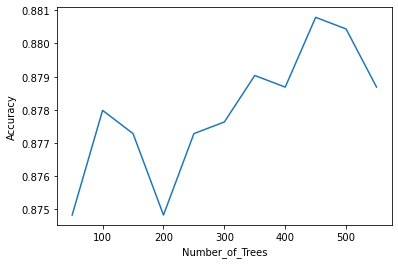

In [83]:
plt.plot(df_rfc["Number_of_Trees"],df_rfc["Oob_Accuracy"])
plt.xlabel("Number_of_Trees")
plt.ylabel("Accuracy")
plt.show()

In [84]:
df_rfc.sort_values(by="Oob_Accuracy",ascending=False)

,Number_of_Trees,Oob_Accuracy
8,450,0.8807854137447405
9,500,0.8804347826086957
6,350,0.8790322580645161
7,400,0.8786816269284713
10,550,0.8786816269284713
1,100,0.8779803646563815
5,300,0.8776297335203366
2,150,0.8772791023842917
4,250,0.8772791023842917
0,50,0.8748246844319776


Let's build our model for best Oob Accuracy to calculate Test Accuracy result.

In [85]:
clf = RandomForestClassifier(random_state=42 , n_estimators = 450, oob_score=True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred),'Oob Accuracy:',clf.oob_score_)

Test Accuracy: 0.8529411764705882 Oob Accuracy: 0.8807854137447405


And now let's tune max features.

In [86]:
Oob_accuracy=[]
for i in range(1,11):
    clf=RandomForestClassifier(random_state=42,n_estimators=450,max_features=i,oob_score=True)
    clf.fit(X_train,y_train)
    Oob_accuracy.append([i,np.array(clf.oob_score_)])
df_rfc = pd.DataFrame(Oob_accuracy,columns=['Number_of_Features','Oob Accuracy'])
df_rfc.sort_values(by="Oob Accuracy", ascending=False)

,Number_of_Features,Oob Accuracy
8,9,0.8832398316970547
3,4,0.8821879382889201
4,5,0.8821879382889201
7,8,0.8821879382889201
5,6,0.8811360448807855
9,10,0.8811360448807855
2,3,0.8807854137447405
6,7,0.8807854137447405
1,2,0.8776297335203366
0,1,0.8758765778401122


And now let's calculate Test Accuracy with best max features and n estimaters parameter to calculate Oob Accuracy.

In [87]:
clf=RandomForestClassifier(random_state=42,n_estimators=450,max_features=9,oob_score=True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred),'Oob Accuracy:',clf.oob_score_)

Test Accuracy: 0.8585434173669467 Oob Accuracy: 0.8832398316970547


### 5.2 Parameter Tuning
    Now instead of applying for loops for each parameter, GridSearchCV can do those steps for us. Let's use GridSearchCv to tune parameters.
    
### 5.2.1 Parameter Tuning For Random Forest Classifier

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
clf = RandomForestClassifier(random_state=42)
#number of trees in random forest
n_estimators = np.arange(50,600,50)
#number of features for each split
max_features = np.arange(1,11)
params = {
    "n_estimators":n_estimators,
    "max_features":max_features
}
params

{'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]),
 'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}

Key value in Params dictionary should be the same with parameter in RandomForestClassifier in terms of spelling.

In [90]:
clf_grid = GridSearchCV(estimator=clf,param_grid=params,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)

clf_grid.fit(X_train,y_train)

print(clf_grid.best_params_)

Fitting 5 folds for each of 110 candidates, totalling 550 fits
{'max_features': 4, 'n_estimators': 250}


In [91]:
clf=RandomForestClassifier(random_state=42,n_estimators=250,max_features=4,oob_score=True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.8557422969187675


**In those processes above, we standardise X_train data. But we also use this standardise data in validation data set. We should standardise just train set not validation set. Thus, in grid search in every iteration we should have standardise over and over again. In order to do that, we can use pipeline.**

In [92]:
from sklearn.pipeline import Pipeline

In [93]:
pipe = Pipeline([('scaler',StandardScaler()),('clf', RandomForestClassifier())])

In [94]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [95]:
rfc=RandomForestClassifier(random_state=42)
# number of trees in random forest
n_estimators = [100,200,300,400,500,600]
# number of features at every split
max_features = [1,2,3,4,5,6,7,8,9,10]
# create grid
params = {
 'Random_Forest__n_estimators': n_estimators,
 'Random_Forest__max_features': max_features,
 }

pipe = Pipeline([('scaler',StandardScaler()),('Random_Forest', rfc)])


rfc_grid = GridSearchCV(estimator = pipe, param_grid = params, cv = 5, verbose=2, scoring='accuracy',n_jobs = -1)

rfc_grid.fit(X_train, y_train)

print(rfc_grid.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'Random_Forest__max_features': 9, 'Random_Forest__n_estimators': 600}


In [96]:
rfc=RandomForestClassifier(random_state=42,n_estimators=600,max_features=9,oob_score=True)
rfc.fit(X_trainStandard,y_train)
y_pred_rfc = rfc.predict(X_testStandard)
print('Test Accuracy:', accuracy_score(y_test, y_pred_rfc))

Test Accuracy: 0.8949579831932774


Let's add accuracy values in a dictionary

In [97]:
accuracy = {}
accuracy["Random Forest Classifier"] = accuracy_score(y_test, y_pred_rfc)

Let's check the importances of features for just Random Forest Classifier

In [98]:
rfc.feature_importances_

array([0.13827913, 0.02036822, 0.09242581, 0.62784911, 0.02087236,
       0.03037641, 0.02092367, 0.01457991, 0.022308  , 0.01201738])

In [99]:
feats ={}

for feature,importances in zip(X.columns, rfc.feature_importances_):
    feats[feature]=importances    
feats

{'Age': 0.13827912973848072,
 'Gender_Male': 0.020368218302634702,
 'Internships': 0.09242581435759838,
 'CGPA': 0.6278491131519531,
 'Hostel': 0.020872359880639818,
 'HistoryOfBacklogs': 0.030376414324445926,
 'Stream_Computer Science': 0.02092366502825687,
 'Stream_Electronics And Communication': 0.014579907567608802,
 'Stream_Information Technology': 0.02230799873776814,
 'Stream_Mechanical': 0.01201737891061356}

In [100]:
Gini_importance = pd.DataFrame.from_dict(feats, orient="index")

In [101]:
Gini_importance.set_axis(["Gini_Importance"],axis=1, inplace=True)

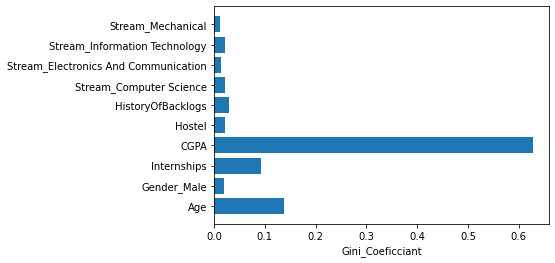

In [102]:
plt.barh(Gini_importance.index,Gini_importance["Gini_Importance"])
plt.xlabel("Gini_Coeficciant")
plt.show()

In [103]:
confusion_matrix(y_pred_rfc,y_test)

array([[285,  49],
       [ 26, 354]], dtype=int64)

In [104]:
print(classification_report(y_pred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       334
           1       0.88      0.93      0.90       380

    accuracy                           0.89       714
   macro avg       0.90      0.89      0.89       714
weighted avg       0.90      0.89      0.89       714



### 5.2.2 Parameter Tuning for KNeighborsClassifier

    In KNN processes above, we again standardise X_train data and we did not apply GridSearch. Let's apply GridSearch and pipeline to KNN algorithm. 

In [105]:
knn=KNeighborsClassifier()
# number of neighbors
n_neighbors = np.arange(15)
# weights type
weights = ['uniform', 'distance']
# Algorithm used to compute the nearest neighbors
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
# create grid
params = {
 'KN_Classifier__n_neighbors': n_neighbors,
 'KN_Classifier__weights': weights,
    'KN_Classifier__algorithm': algorithm,
 }

pipe = Pipeline([('scaler',StandardScaler()),('KN_Classifier', knn)])


knn_grid = GridSearchCV(estimator = pipe, param_grid = params, cv = 5, verbose=2, scoring='accuracy',n_jobs = -1)

knn_grid.fit(X_train, y_train)

print(knn_grid.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'KN_Classifier__algorithm': 'auto', 'KN_Classifier__n_neighbors': 8, 'KN_Classifier__weights': 'distance'}


C:\Users\TKA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.83800658 0.83800658 0.83555597 0.84537561
 0.83204412 0.84501613 0.83379666 0.85063201 0.82819    0.84958184
 0.83029158 0.85519157 0.83309982 0.85974867 0.83520386 0.86220235
 0.82924325 0.85834393 0.83029281 0.85939595 0.82888746 0.85904569
 0.82328018 0.85939779 0.82432974 0.85869481 0.8190715  0.85694473
        nan        nan 0.83905859 0.83905859 0.83204842 0.84467386
 0.8313436  0.84431499 0.83134421 0.84957999 0.8253836  0.84782806
 0.82923833 0.85378806 0.83239684 0.85939718 0.83485175 0.86185025
 0.83064553 0.85869481 0.8288936  0.85904507 0.83029096 0.85939595
 0.82363229 0.85869604 0.82468123 0.86044674 0.81907334 0.85799674
        nan        nan 0.83800658 0.83800658 0.83555597 0.84537561
 0.83204412 0.84501613 0.83379666 0.85063201 0.82819    0.84958184
 0.83029158 0.85519157 0.83309982 0.85974867 0.83520386

In [106]:
knn = KNeighborsClassifier(algorithm = "auto", n_neighbors = 8, weights = "distance")
knn.fit(X_trainStandard,y_train)
y_pred_knn = knn.predict(X_testStandard)
print("Test_Accuracy:", accuracy_score(y_test, y_pred_knn))
accuracy["KNeighbors Classifier"] = accuracy_score(y_test, y_pred_knn)

Test_Accuracy: 0.8753501400560224


In [107]:
confusion_matrix(y_pred_knn,y_test)

array([[281,  59],
       [ 30, 344]], dtype=int64)

In [108]:
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       340
           1       0.85      0.92      0.89       374

    accuracy                           0.88       714
   macro avg       0.88      0.87      0.87       714
weighted avg       0.88      0.88      0.87       714



### 5.2.3 Boosting Models & Tuning Their Parameters
    Now instead of searching best model for Gradient Boost and Ada Boost algorithm we can search best model for both. Let's Try Gradient Boost and Ada Boost Algorithms in the same Grid Search CV.

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [110]:
AdaBoostClassifier()
GradientBoostingClassifier()

GradientBoostingClassifier()

In [111]:
pipe = Pipeline([("scaler",StandardScaler()),("classifier",GradientBoostingClassifier())])

models = [{"classifier":[GradientBoostingClassifier(random_state=42)],
          "classifier__learning_rate": [1, 0.1, 0.01],
          "classifier__max_depth": [1, 2, 3],
          "classifier__n_estimators": [100, 1000, 5000, 10000]},
         {"classifier":[AdaBoostClassifier(random_state=42)],
          "classifier__learning_rate": [1, 0.1, 0.01],
          "classifier__n_estimators": [100, 1000, 5000, 10000]}]

boosting_search =GridSearchCV(estimator=pipe, param_grid=models, scoring= "accuracy", cv=5, verbose= 2 , n_jobs= -1)
grad_grid = boosting_search.fit(X_train,y_train)
grad_grid.best_estimator_.get_params()["classifier"]

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GradientBoostingClassifier(n_estimators=1000, random_state=42)

In [112]:
grad_grid.best_params_

{'classifier': GradientBoostingClassifier(n_estimators=1000, random_state=42),
 'classifier__learning_rate': 0.1,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 1000}

In [113]:
gbc = GradientBoostingClassifier(random_state =42 ,learning_rate=0.1 , max_depth =3 , n_estimators = 1000)
gbc.fit(X_trainStandard, y_train)
y_pred_gbc = gbc.predict(X_testStandard)
print("Test_Score: ", accuracy_score(y_test,y_pred_gbc))

Test_Score:  0.8851540616246498


In [114]:
confusion_matrix(y_pred_gbc,y_test)

array([[290,  61],
       [ 21, 342]], dtype=int64)

In [115]:
print(classification_report(y_pred_gbc,y_test))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       351
           1       0.85      0.94      0.89       363

    accuracy                           0.89       714
   macro avg       0.89      0.88      0.88       714
weighted avg       0.89      0.89      0.88       714



In [116]:
accuracy["Gradient Boost Classifier"] = accuracy_score(y_test,y_pred_gbc)

We know that Gradient Boost out perform Ada Boost But in order to compare 2 results We build a seperate Ada Boost Model.

In [117]:
pipe = Pipeline([("scaler",StandardScaler()),("Ada_Boost_classifier",AdaBoostClassifier(random_state = 42))])

models = {"Ada_Boost_classifier__learning_rate": [1, 0.1, 0.01],
          "Ada_Boost_classifier__n_estimators": [100, 1000, 5000, 10000]}

ada_search = GridSearchCV(estimator=pipe, param_grid=models, scoring= "accuracy", cv=5, verbose= 2 , n_jobs= -1)
ada_grid = ada_search.fit(X_train,y_train)
ada_grid.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'Ada_Boost_classifier__learning_rate': 1,
 'Ada_Boost_classifier__n_estimators': 1000}

In [118]:
abc = AdaBoostClassifier(learning_rate=1, random_state=42, n_estimators=1000)
abc.fit(X_trainStandard,y_train)
y_pred_abc = abc.predict(X_testStandard)
print("Test_Score: ", accuracy_score(y_test,y_pred_abc))

Test_Score:  0.8529411764705882


In [119]:
confusion_matrix(y_test,y_pred_abc)

array([[280,  31],
       [ 74, 329]], dtype=int64)

In [120]:
print(classification_report(y_test,y_pred_abc))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       311
           1       0.91      0.82      0.86       403

    accuracy                           0.85       714
   macro avg       0.85      0.86      0.85       714
weighted avg       0.86      0.85      0.85       714



In [121]:
accuracy["Ada Boost Classifier"] = accuracy_score(y_test,y_pred_abc)

In [122]:
knn_grid.best_params_,rfc_grid.best_params_,grad_grid.best_params_,ada_grid.best_params_

({'KN_Classifier__algorithm': 'auto',
  'KN_Classifier__n_neighbors': 8,
  'KN_Classifier__weights': 'distance'},
 {'Random_Forest__max_features': 9, 'Random_Forest__n_estimators': 600},
 {'classifier': GradientBoostingClassifier(n_estimators=1000, random_state=42),
  'classifier__learning_rate': 0.1,
  'classifier__max_depth': 3,
  'classifier__n_estimators': 1000},
 {'Ada_Boost_classifier__learning_rate': 1,
  'Ada_Boost_classifier__n_estimators': 1000})

**Now let's merge all the best parameters and put it in a data frame**

In [123]:
best_params_for_each_model = {**knn_grid.best_params_,**rfc_grid.best_params_,**grad_grid.best_params_,**ada_grid.best_params_}

In [124]:
best_param_df = pd.DataFrame.from_dict(best_params_for_each_model, orient ="index")
best_param_df.set_axis(["Values"],axis="columns",inplace=True)

In [125]:
best_param_df.set_axis(["KN_Classifier Algorithm","KN_Classifier n_neighbors","KN_Classifier Weights", 
                        "Random_Forest Max_features", "Random_Forest n_estimators", "Classifier",
                       "Gradient Boost Learning Rate", "Gradient Boost Max_depth", "Gradient Boost n_estimators",
                       "Ada Boost Learning Rate","Ada Boost n_estimators"],axis="index",inplace=True)

In [126]:
best_param_df.drop("Classifier", inplace=True)

In [127]:
best_param_df

,Values
KN_Classifier Algorithm,auto
KN_Classifier n_neighbors,8
KN_Classifier Weights,distance
Random_Forest Max_features,9
Random_Forest n_estimators,600
Gradient Boost Learning Rate,0.1
Gradient Boost Max_depth,3
Gradient Boost n_estimators,1000
Ada Boost Learning Rate,1
Ada Boost n_estimators,1000


In [128]:
accuracy_df = pd.DataFrame.from_dict(accuracy, orient="index")

In [129]:
accuracy_df.set_axis(["Accuracy"],axis="columns",inplace=True)

In [130]:
accuracy_df

,Accuracy
Random Forest Classifier,0.894958
KNeighbors Classifier,0.875350
Gradient Boost Classifier,0.885154
Ada Boost Classifier,0.852941


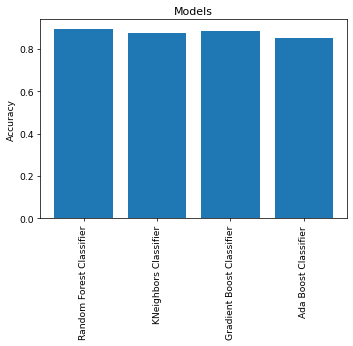

In [131]:
plt.figure(dpi=66)

plt.bar(accuracy_df.index,accuracy_df["Accuracy"])
plt.xticks(rotation=90)
plt.title("Models")
plt.ylabel("Accuracy")
plt.show()

## SUMMARY
    According to our all models, best performing model is Random Forest Classifier with 0.89 accuracy rate.